In [1]:
import pandas as pd
import numpy as np

In [2]:
# Path to your dataset
file_path = r"C:\Users\sahil\Desktop\Intership\Task-2\sales_data.csv"

In [3]:
# Load the dataset
data = pd.read_csv(file_path)

In [4]:
# Basic exploration
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())
print("Missing Values:")
print(data.isnull().sum())

Dataset Shape: (113036, 18)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 

In [5]:
# Remove duplicates
data = data.drop_duplicates()

In [6]:
# Fill missing numerical values with the median
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [7]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [8]:
# Fill or drop invalid dates
data = data.dropna(subset=['Date'])


In [11]:
print(data.columns)

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


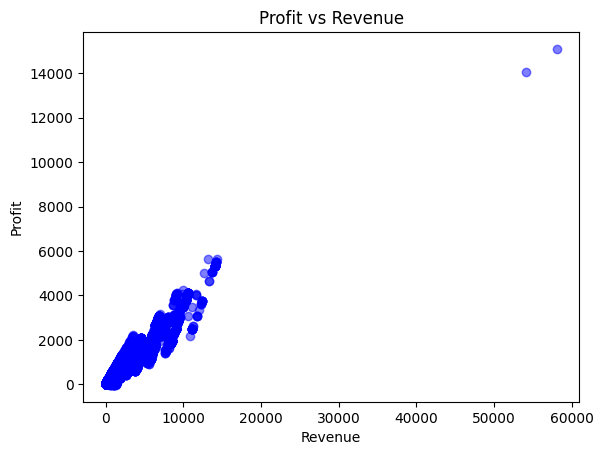

In [15]:
plt.scatter(data['Revenue'], data['Profit'], alpha=0.5, c='blue')
plt.title("Profit vs Revenue")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.show()



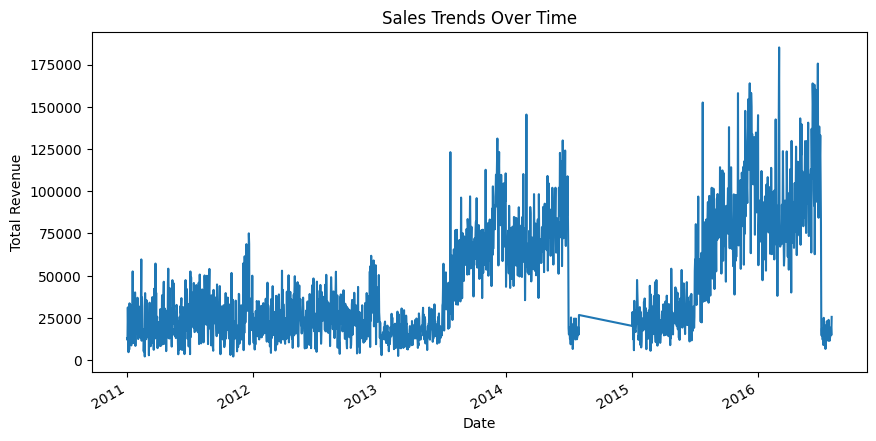

In [16]:
# Group data by Date and sum Revenue
sales_trend = data.groupby('Date')['Revenue'].sum()

# Plot the sales trend
sales_trend.plot(figsize=(10, 5), title="Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()


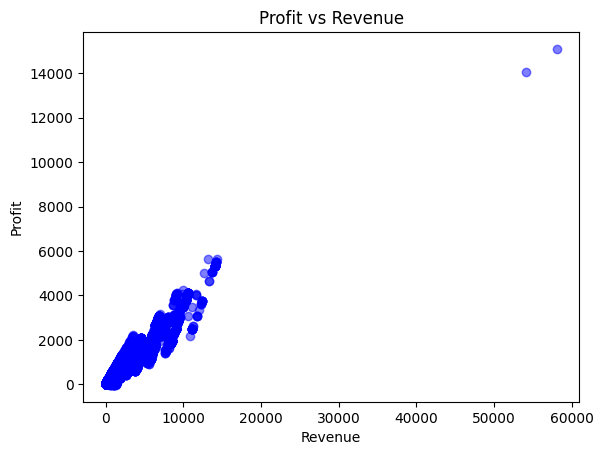

In [17]:
plt.scatter(data['Revenue'], data['Profit'], alpha=0.5, c='blue')
plt.title("Profit vs Revenue")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.show()


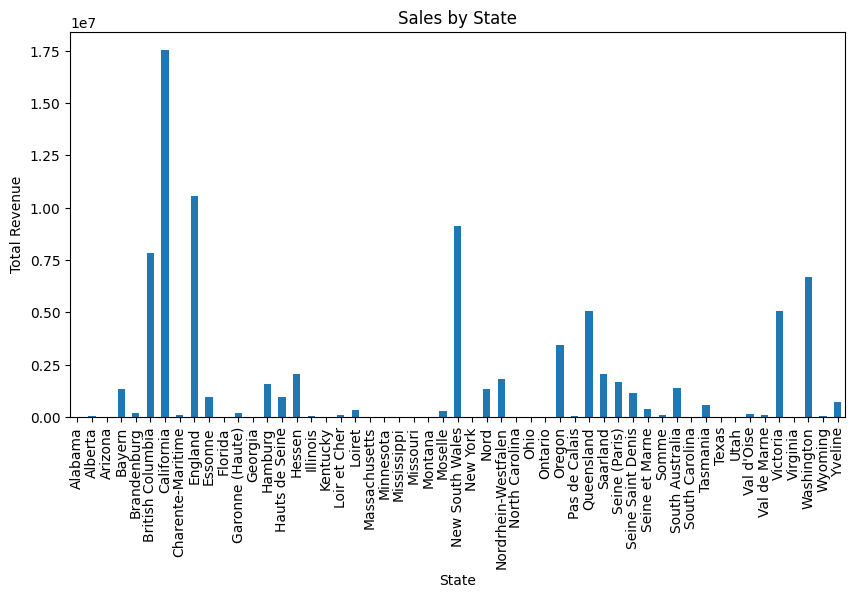

In [21]:
# Group by State and sum Revenue
sales_by_state = data.groupby('State')['Revenue'].sum()

# Bar plot for sales by state
sales_by_state.plot(kind='bar', figsize=(10, 5), title="Sales by State")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.show()


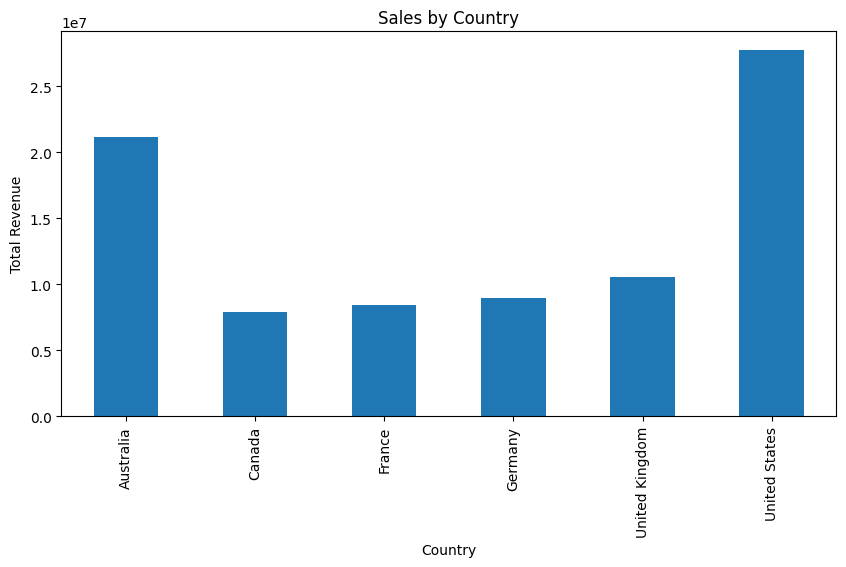

In [22]:
# Group by Country and sum Revenue
sales_by_country = data.groupby('Country')['Revenue'].sum()

# Bar plot for sales by country
sales_by_country.plot(kind='bar', figsize=(10, 5), title="Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.show()


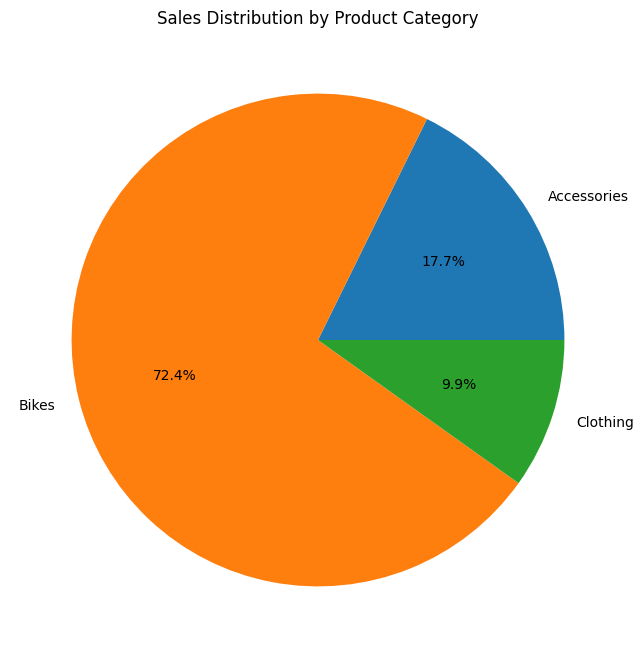

In [19]:
# Group by Product Category and sum Revenue
sales_by_category = data.groupby('Product_Category')['Revenue'].sum()

# Pie chart for sales by product category
sales_by_category.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title="Sales Distribution by Product Category")
plt.ylabel("")  # Hide the y-label
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
X = data[['Profit', 'Unit_Price']]  # Independent variables
y = data['Revenue']  # Dependent variable (Revenue)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 115835.03528028214
R² Score: 0.932922364746396
